# Pitching Basic Modeling

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, \
RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
AdaBoostClassifier, GradientBoostingClassifier

from pickle import dump, load

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

np.random_state = 42

In [2]:
# load batting_basic
pitching_basic = pd.read_csv('Data/pitching_basic', index_col = 0)
pitching_basic = pitching_basic.drop(columns = ['Season', 'Name'])
pitching_basic

,Team,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches
0,CHC,24.0,300000.0,394681.0,3.0,0.0,-0.2,4.08,45.0,0.0,0.0,0.0,0.0,0.0,53.0,225.0,41.0,25.0,24.0,9.0,28.0,0.0,1.0,1.0,0.0,49.0,54.0,64.0,28.0,5.0,361.0,601.0,962.0
1,CHW,25.0,387500.0,499430.0,2.0,1.0,0.2,6.40,25.0,0.0,0.0,0.0,0.0,3.0,32.1,151.0,39.0,24.0,23.0,4.0,17.0,3.0,1.0,2.0,0.0,36.0,35.0,40.0,20.0,2.0,244.0,364.0,608.0
2,BOS,26.0,403250.0,498328.0,4.0,2.0,-0.1,5.55,47.0,0.0,0.0,0.0,0.0,1.0,48.2,228.0,49.0,32.0,30.0,4.0,35.0,2.0,5.0,3.0,0.0,49.0,59.0,51.0,24.0,7.0,397.0,573.0,970.0
3,SEA,27.0,419000.0,518380.0,3.0,6.0,2.0,2.52,73.0,0.0,0.0,0.0,38.0,4.0,71.1,296.0,49.0,23.0,20.0,4.0,34.0,3.0,0.0,2.0,0.0,80.0,45.0,96.0,37.0,8.0,494.0,775.0,1269.0
4,SEA,28.0,2750000.0,3315355.0,0.0,6.0,0.3,3.44,53.0,0.0,0.0,0.0,31.0,5.0,49.2,202.0,33.0,19.0,19.0,5.0,25.0,5.0,2.0,2.0,0.0,49.0,42.0,53.0,23.0,4.0,337.0,530.0,867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9438,DET,22.0,410000.0,528429.0,2.0,3.0,0.2,4.28,28.0,0.0,0.0,0.0,1.0,4.0,33.2,142.0,23.0,16.0,16.0,3.0,17.0,2.0,1.0,3.0,0.0,27.0,35.0,46.0,15.0,6.0,211.0,342.0,553.0
9439,DET,23.0,420000.0,519027.0,0.0,2.0,-0.4,3.47,21.0,0.0,0.0,0.0,1.0,4.0,23.1,114.0,24.0,13.0,9.0,3.0,22.0,4.0,0.0,6.0,0.0,22.0,28.0,28.0,14.0,2.0,192.0,258.0,450.0
9440,DET,24.0,735000.0,909330.0,3.0,3.0,-0.2,4.94,29.0,0.0,0.0,0.0,1.0,6.0,31.0,149.0,34.0,18.0,17.0,5.0,22.0,3.0,1.0,1.0,0.0,30.0,32.0,48.0,13.0,3.0,215.0,368.0,583.0
9441,DET,25.0,915000.0,1103109.0,2.0,1.0,1.1,2.35,31.0,0.0,0.0,0.0,1.0,2.0,38.1,156.0,32.0,14.0,10.0,1.0,11.0,0.0,0.0,2.0,0.0,34.0,40.0,51.0,17.0,7.0,224.0,373.0,597.0


## Checking Correlations Between Features

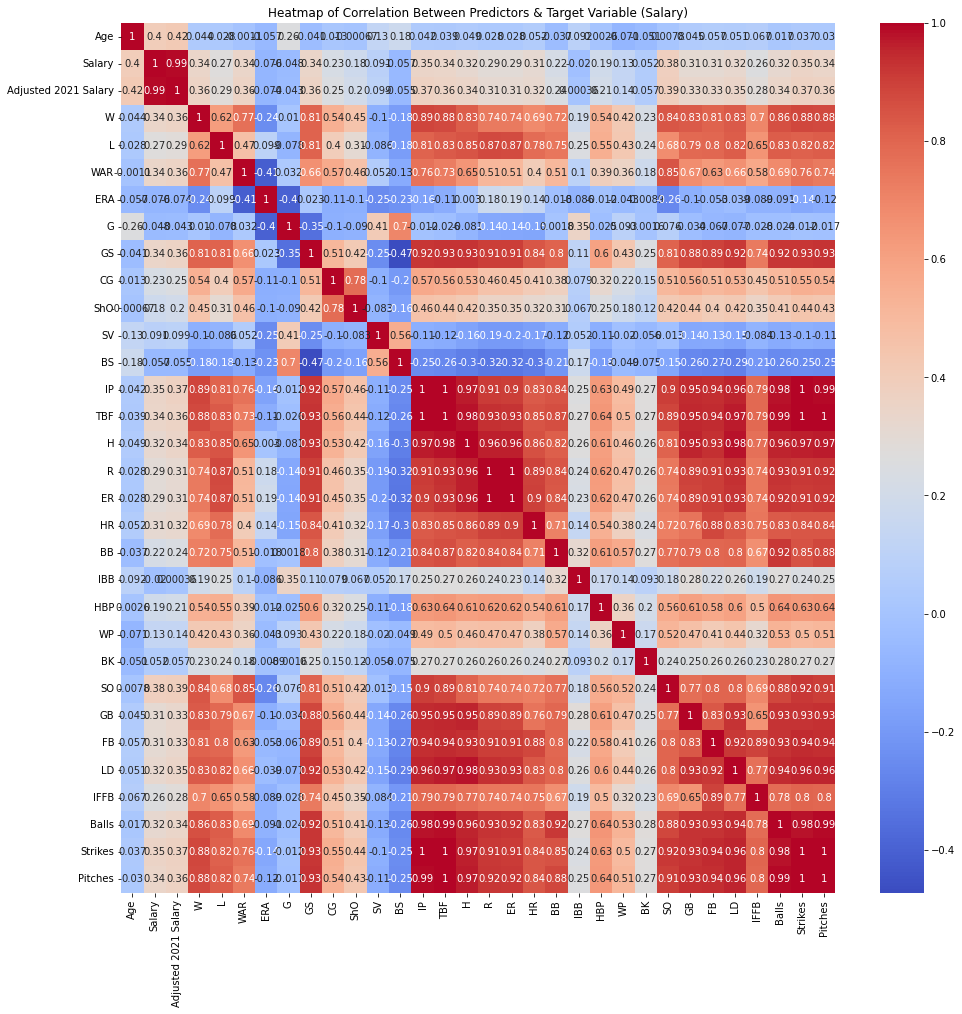

In [3]:
# set up figure size
fig, ax = plt.subplots(figsize=(16, 16))

# set up correlation matrix
corr = pitching_basic.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Predictors & Target Variable (Salary)");

plt.show()

## Feature Selection

**Multicollinearity**

In [4]:
corr_df = pitching_basic.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [5]:
corr_df[(corr_df.cc>0.9) & (corr_df.cc <1)]

,cc
pairs,
"(Strikes, Pitches)",0.997533
"(TBF, IP)",0.997251
"(Pitches, TBF)",0.996309
"(ER, R)",0.996000
"(Strikes, IP)",0.995971
...,...
"(ER, GS)",0.906966
"(FB, ER)",0.906630
"(FB, R)",0.905479


Lots of collinear features. We will selectively remove the top offenders where the features are most collinearly related with each other.

**Feature Selection Using `feature_selection`**

In [6]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, mutual_info_regression

In [7]:
feature_selector = SelectKBest(mutual_info_regression, k = 15)

In [8]:
pitching_basic.columns

Index(['Team', 'Age', 'Salary', 'Adjusted 2021 Salary', 'W', 'L', 'WAR', 'ERA',
       'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR',
       'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
       'Strikes', 'Pitches'],
      dtype='object')

In [9]:
df = pitching_basic[['Age', 'W', 'L', 'WAR', 'ERA',
       'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR',
       'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
       'Strikes', 'Pitches']]

In [10]:
feature_selector.fit(df, pitching_basic['Adjusted 2021 Salary'])

# get top features
df.columns[feature_selector.get_support()]

Index(['Age', 'W', 'G', 'GS', 'IP', 'TBF', 'H', 'R', 'ER', 'SO', 'GB', 'LD',
       'Balls', 'Strikes', 'Pitches'],
      dtype='object')

### Grouping by Name and Averages

In [11]:
pb_grouped = pd.read_csv('Data/pitching_basic', index_col = 0)

In [12]:
pb_grouped

,Season,Name,Team,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches
0,2006.0,David Aardsma,CHC,24.0,300000.0,394681.0,3.0,0.0,-0.2,4.08,45.0,0.0,0.0,0.0,0.0,0.0,53.0,225.0,41.0,25.0,24.0,9.0,28.0,0.0,1.0,1.0,0.0,49.0,54.0,64.0,28.0,5.0,361.0,601.0,962.0
1,2007.0,David Aardsma,CHW,25.0,387500.0,499430.0,2.0,1.0,0.2,6.40,25.0,0.0,0.0,0.0,0.0,3.0,32.1,151.0,39.0,24.0,23.0,4.0,17.0,3.0,1.0,2.0,0.0,36.0,35.0,40.0,20.0,2.0,244.0,364.0,608.0
2,2008.0,David Aardsma,BOS,26.0,403250.0,498328.0,4.0,2.0,-0.1,5.55,47.0,0.0,0.0,0.0,0.0,1.0,48.2,228.0,49.0,32.0,30.0,4.0,35.0,2.0,5.0,3.0,0.0,49.0,59.0,51.0,24.0,7.0,397.0,573.0,970.0
3,2009.0,David Aardsma,SEA,27.0,419000.0,518380.0,3.0,6.0,2.0,2.52,73.0,0.0,0.0,0.0,38.0,4.0,71.1,296.0,49.0,23.0,20.0,4.0,34.0,3.0,0.0,2.0,0.0,80.0,45.0,96.0,37.0,8.0,494.0,775.0,1269.0
4,2010.0,David Aardsma,SEA,28.0,2750000.0,3315355.0,0.0,6.0,0.3,3.44,53.0,0.0,0.0,0.0,31.0,5.0,49.2,202.0,33.0,19.0,19.0,5.0,25.0,5.0,2.0,2.0,0.0,49.0,42.0,53.0,23.0,4.0,337.0,530.0,867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9438,2007.0,Joel Zumaya,DET,22.0,410000.0,528429.0,2.0,3.0,0.2,4.28,28.0,0.0,0.0,0.0,1.0,4.0,33.2,142.0,23.0,16.0,16.0,3.0,17.0,2.0,1.0,3.0,0.0,27.0,35.0,46.0,15.0,6.0,211.0,342.0,553.0
9439,2008.0,Joel Zumaya,DET,23.0,420000.0,519027.0,0.0,2.0,-0.4,3.47,21.0,0.0,0.0,0.0,1.0,4.0,23.1,114.0,24.0,13.0,9.0,3.0,22.0,4.0,0.0,6.0,0.0,22.0,28.0,28.0,14.0,2.0,192.0,258.0,450.0
9440,2009.0,Joel Zumaya,DET,24.0,735000.0,909330.0,3.0,3.0,-0.2,4.94,29.0,0.0,0.0,0.0,1.0,6.0,31.0,149.0,34.0,18.0,17.0,5.0,22.0,3.0,1.0,1.0,0.0,30.0,32.0,48.0,13.0,3.0,215.0,368.0,583.0
9441,2010.0,Joel Zumaya,DET,25.0,915000.0,1103109.0,2.0,1.0,1.1,2.35,31.0,0.0,0.0,0.0,1.0,2.0,38.1,156.0,32.0,14.0,10.0,1.0,11.0,0.0,0.0,2.0,0.0,34.0,40.0,51.0,17.0,7.0,224.0,373.0,597.0


### Adding Salary Difference

A good indicator of a player's salary could be accounting for the player's difference in salary each year. This could address the large salary difference for players who make a significant amount more in their free agency year. 

In [13]:
pb_grouped['Salary Difference'] = pb_grouped['Adjusted 2021 Salary'].diff()
pb_grouped = pb_grouped.fillna(0)
pb_grouped

,Season,Name,Team,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,Salary Difference
0,2006.0,David Aardsma,CHC,24.0,300000.0,394681.0,3.0,0.0,-0.2,4.08,45.0,0.0,0.0,0.0,0.0,0.0,53.0,225.0,41.0,25.0,24.0,9.0,28.0,0.0,1.0,1.0,0.0,49.0,54.0,64.0,28.0,5.0,361.0,601.0,962.0,0.0
1,2007.0,David Aardsma,CHW,25.0,387500.0,499430.0,2.0,1.0,0.2,6.40,25.0,0.0,0.0,0.0,0.0,3.0,32.1,151.0,39.0,24.0,23.0,4.0,17.0,3.0,1.0,2.0,0.0,36.0,35.0,40.0,20.0,2.0,244.0,364.0,608.0,104749.0
2,2008.0,David Aardsma,BOS,26.0,403250.0,498328.0,4.0,2.0,-0.1,5.55,47.0,0.0,0.0,0.0,0.0,1.0,48.2,228.0,49.0,32.0,30.0,4.0,35.0,2.0,5.0,3.0,0.0,49.0,59.0,51.0,24.0,7.0,397.0,573.0,970.0,-1102.0
3,2009.0,David Aardsma,SEA,27.0,419000.0,518380.0,3.0,6.0,2.0,2.52,73.0,0.0,0.0,0.0,38.0,4.0,71.1,296.0,49.0,23.0,20.0,4.0,34.0,3.0,0.0,2.0,0.0,80.0,45.0,96.0,37.0,8.0,494.0,775.0,1269.0,20052.0
4,2010.0,David Aardsma,SEA,28.0,2750000.0,3315355.0,0.0,6.0,0.3,3.44,53.0,0.0,0.0,0.0,31.0,5.0,49.2,202.0,33.0,19.0,19.0,5.0,25.0,5.0,2.0,2.0,0.0,49.0,42.0,53.0,23.0,4.0,337.0,530.0,867.0,2796975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9438,2007.0,Joel Zumaya,DET,22.0,410000.0,528429.0,2.0,3.0,0.2,4.28,28.0,0.0,0.0,0.0,1.0,4.0,33.2,142.0,23.0,16.0,16.0,3.0,17.0,2.0,1.0,3.0,0.0,27.0,35.0,46.0,15.0,6.0,211.0,342.0,553.0,98226.0
9439,2008.0,Joel Zumaya,DET,23.0,420000.0,519027.0,0.0,2.0,-0.4,3.47,21.0,0.0,0.0,0.0,1.0,4.0,23.1,114.0,24.0,13.0,9.0,3.0,22.0,4.0,0.0,6.0,0.0,22.0,28.0,28.0,14.0,2.0,192.0,258.0,450.0,-9402.0
9440,2009.0,Joel Zumaya,DET,24.0,735000.0,909330.0,3.0,3.0,-0.2,4.94,29.0,0.0,0.0,0.0,1.0,6.0,31.0,149.0,34.0,18.0,17.0,5.0,22.0,3.0,1.0,1.0,0.0,30.0,32.0,48.0,13.0,3.0,215.0,368.0,583.0,390303.0
9441,2010.0,Joel Zumaya,DET,25.0,915000.0,1103109.0,2.0,1.0,1.1,2.35,31.0,0.0,0.0,0.0,1.0,2.0,38.1,156.0,32.0,14.0,10.0,1.0,11.0,0.0,0.0,2.0,0.0,34.0,40.0,51.0,17.0,7.0,224.0,373.0,597.0,193779.0


In [14]:
# group by Name and find averages across all other features
pb_grouped = pb_grouped.groupby(['Name']).mean()
pb_grouped = pb_grouped.drop(columns = 'Season')
pb_grouped.head()

,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,Salary Difference
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Achter,27.0,3.925000e+05,4.330430e+05,1.000000,0.000000,-0.400000,3.110000,27.000000,0.000000,0.000000,0.000000,0.0,0.000000,37.200000,160.000000,43.000000,13.000000,13.000000,7.000000,12.000000,1.000000,1.000000,0.000000,0.000000,14.000000,60.000000,46.000000,27.000000,4.000000,211.000000,357.000000,568.000000,-859290.000000
A.J. Alexy,23.0,3.800000e+05,3.800000e+05,3.000000,1.000000,-0.100000,4.700000,5.000000,4.000000,0.000000,0.000000,0.0,0.000000,23.000000,97.000000,13.000000,12.000000,12.000000,4.000000,17.000000,0.000000,1.000000,0.000000,0.000000,17.000000,14.000000,32.000000,14.000000,4.000000,179.000000,245.000000,424.000000,0.000000
A.J. Burnett,31.5,1.025839e+07,1.232869e+07,10.428571,9.714286,2.821429,3.996429,27.714286,27.357143,1.571429,0.642857,0.0,0.071429,173.657143,741.857143,161.214286,84.071429,76.571429,16.571429,67.714286,1.928571,9.571429,10.857143,0.357143,163.928571,248.214286,148.214286,93.785714,13.714286,1064.714286,1727.928571,2792.642857,114032.928571
A.J. Cole,26.0,4.642400e+05,4.947436e+05,2.800000,2.000000,0.060000,4.404000,20.000000,3.600000,0.000000,0.000000,0.4,0.800000,37.460000,166.200000,38.600000,22.000000,19.200000,7.400000,16.000000,0.800000,1.000000,1.600000,0.200000,38.400000,38.200000,51.200000,19.200000,5.200000,244.600000,427.200000,671.800000,-403192.000000
A.J. Griffin,26.5,8.693750e+05,9.550178e+05,8.500000,5.250000,0.800000,4.472500,22.000000,21.250000,0.500000,0.500000,0.0,0.000000,119.550000,501.500000,109.250000,60.000000,57.750000,23.500000,36.750000,0.750000,4.500000,2.250000,0.250000,100.750000,112.750000,173.250000,69.500000,25.500000,723.500000,1281.000000,2004.500000,364850.500000


## Train-Test Split

Using domain knowledge and the above `feature_selection`, we wil define the X as features we want to keep for the Train-Test Split

**Splitting the Batting Basic**

In [15]:
pitching_basic.columns

Index(['Team', 'Age', 'Salary', 'Adjusted 2021 Salary', 'W', 'L', 'WAR', 'ERA',
       'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR',
       'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
       'Strikes', 'Pitches'],
      dtype='object')

In [17]:
# feature selection, target variable = 'Adjusted 2021 Salary'
X = pitching_basic[['Team', 'Age', 'W', 'L', 'WAR', 'ERA',
       'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR',
       'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
       'Strikes', 'Pitches']]

y = pitching_basic['Adjusted 2021 Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [18]:
X_train.head(3)

,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches
3438,NYY,37.0,2.0,2.0,0.6,3.47,9.0,9.0,0.0,0.0,0.0,0.0,49.1,196.0,37.0,19.0,19.0,8.0,15.0,0.0,1.0,0.0,0.0,42.0,60.0,48.0,27.0,4.0,288.0,499.0,787.0
5711,MIA,27.0,8.0,1.0,-0.3,1.82,60.0,0.0,0.0,0.0,0.0,7.0,64.1,272.0,58.0,17.0,13.0,6.0,24.0,6.0,4.0,8.0,1.0,50.0,111.0,40.0,36.0,1.0,349.0,590.0,939.0
1074,CLE,35.0,5.0,5.0,1.6,5.20,35.0,21.0,1.0,0.0,0.0,2.0,145.1,646.0,155.0,91.0,84.0,16.0,57.0,3.0,9.0,9.0,1.0,95.0,195.0,192.0,88.0,21.0,933.0,1485.0,2418.0


**Splitting the Batting Basic Grouped**

In [19]:
pb_grouped.columns

Index(['Age', 'Salary', 'Adjusted 2021 Salary', 'W', 'L', 'WAR', 'ERA', 'G',
       'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB',
       'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
       'Strikes', 'Pitches', 'Salary Difference'],
      dtype='object')

In [20]:
top_features = ['Age', 'Salary Difference', 'W', 'L', 'WAR', 'ERA', 'G',
           'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB',
           'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
           'Strikes', 'Pitches']

In [21]:
# feature selection, target variable = 'Adjusted 2021 Salary'
X = pb_grouped[['Age', 'Salary Difference', 'W', 'L', 'WAR', 'ERA', 'G',
           'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB',
           'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls',
           'Strikes', 'Pitches']]

y = pb_grouped['Adjusted 2021 Salary']
grouped_X_train, grouped_X_test, grouped_y_train, grouped_y_test = train_test_split(X, y, random_state= 42)

In [22]:
grouped_X_train.head(3)

,Age,Salary Difference,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alex Lange,25.000000,-3.776000e+06,1.000000,3.000000,0.100000,4.040000,36.000000,0.000000,0.0,0.000000,1.0,2.0,35.200000,162.000000,37.000000,18.000000,16.000000,5.000000,16.000000,0.000000,3.000000,6.000000,0.000000,39.000000,46.000000,31.000000,27.000000,3.000000,239.000000,400.000000,639.000000
Alec Asher,24.000000,-1.790340e+06,1.333333,4.000000,0.133333,5.613333,12.000000,6.000000,0.0,0.000000,0.0,0.0,38.733333,171.333333,41.666667,25.666667,24.000000,6.333333,12.333333,0.666667,3.333333,2.000000,0.666667,25.333333,47.333333,54.666667,25.000000,6.666667,251.333333,413.333333,664.666667
Ervin Santana,29.133333,-3.043333e+04,10.066667,8.466667,1.886667,4.415333,28.133333,25.533333,1.4,0.733333,0.0,0.0,164.686667,694.533333,158.133333,80.466667,74.733333,21.666667,51.333333,2.333333,6.933333,6.866667,0.733333,131.533333,199.266667,198.800000,99.466667,19.866667,961.200000,1650.066667,2611.266667


In [23]:
X_train_corr_df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
X_train_corr_df['pairs'] = list(zip(X_train_corr_df.level_0, X_train_corr_df.level_1))

# set index to pairs
X_train_corr_df.set_index(['pairs'], inplace = True)

#drop level columns
X_train_corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
X_train_corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
X_train_corr_df.drop_duplicates(inplace=True)

In [24]:
X_train_corr_df[(X_train_corr_df.cc>0.75) & (X_train_corr_df.cc <1)].head()

,cc
pairs,
"(Strikes, Pitches)",0.997486
"(TBF, IP)",0.997220
"(Pitches, TBF)",0.996276
"(R, ER)",0.996170
"(IP, Strikes)",0.995911


In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7082, 31)
(2361, 31)
(7082,)
(2361,)


In [26]:
print(grouped_X_train.shape)
print(grouped_X_test.shape)
print(grouped_y_train.shape)
print(grouped_y_test.shape)

(1755, 31)
(585, 31)
(1755,)
(585,)


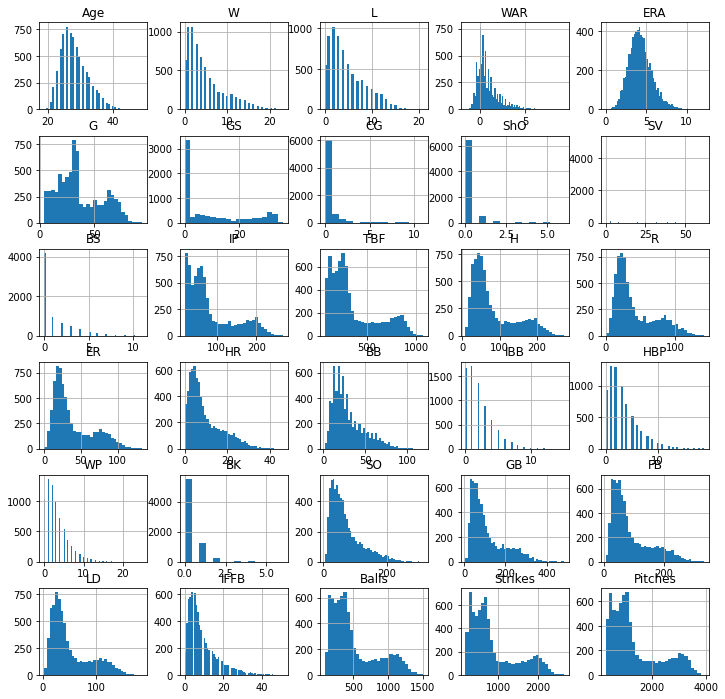

In [27]:
# check distribution of features
X_train.hist(figsize = [12,12], bins = 'auto')
plt.show()

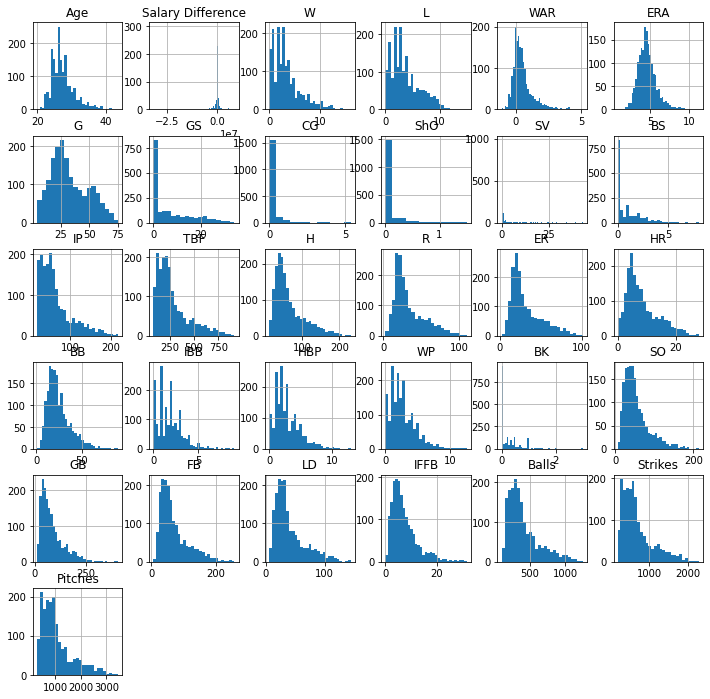

In [28]:
grouped_X_train.hist(figsize = [12,12], bins = 'auto')
plt.show()

## Preprocessing Pipeline (Removing Multicolinear Features)
Note: The new column transformer `bb_ct_2` performs a column transformation on the X features we want to keep after feature selection. 

In [33]:
# define categorical columns to be OHE
cat_cols = X_train.select_dtypes(['object']).columns

# define numeric columns to be standard scaled
num_cols = X_train.select_dtypes(['int', 'float']).columns
num_cols_grp = grouped_X_train.select_dtypes(['int', 'float']).columns

In [34]:
# define numeric transformation pipeline that scales the numbers
numeric_pipeline = Pipeline([('numnorm', StandardScaler()), # apply a standard scaler
#                              ('poly', PolynomialFeatures(interaction_only = True # interactions 
#                                                          )) 
                             ])

# define a nominal transformation pipeline that OHE the cats, and MaxAbsScales the set
nominal_pipeline = Pipeline([('onehotenc', OneHotEncoder(categories="auto", # ohe the cat variables
                                                         sparse = False))]) 

In [35]:
# transform the selected columns with nominal, and numeric pipelines
pb_ct_2 = ColumnTransformer(transformers = 
                    [("nominalpipe", nominal_pipeline, cat_cols), 
                     ("numpipe", numeric_pipeline, num_cols)])

In [36]:
# transform the selected columns with numeric pipelines (for grouped set ONLY)
pb_ct_3 = ColumnTransformer(transformers = 
                    [("numpipe", numeric_pipeline, num_cols_grp)])

### Pickle the Transformers

In [37]:
# save the transformer
dump(pb_ct_2, open('pkl/pb_ct_2.pkl', 'wb'))

# save the grouped transformer
dump(pb_ct_3, open('pkl/pb_ct_3.pkl', 'wb'))

In [38]:
# load the transformer
pb_ct_2 = load(open('pkl/pb_ct_2.pkl', 'rb'))
pb_ct_3 = load(open('pkl/pb_ct_3.pkl', 'rb'))

**Transform `pitching_basic`**

In [39]:
# inspect the preprocessed batting basic X train aka pp_bb_X_train
pp_pb_X_train = pd.DataFrame(pb_ct_2.fit_transform(X_train))
pp_pb_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.072477,-0.640479,-0.720029,-0.223356,-0.548544,-1.349274,-0.056596,-0.323328,-0.269985,-0.315747,-0.624689,-0.597809,-0.670062,-0.774108,-0.776634,-0.717827,-0.246785,-0.761018,-1.027339,-0.769817,-1.092873,-0.469564,-0.550311,-0.610113,-0.634336,-0.650988,-0.655087,-0.650133,-0.628452,-0.639124
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.324597,0.735626,-0.986628,-0.894245,-1.659818,1.199008,-0.807333,-0.323328,-0.269985,-0.315747,3.255084,-0.337423,-0.355276,-0.412554,-0.845154,-0.939555,-0.506748,-0.284078,1.914285,0.235502,1.719911,1.163761,-0.388579,0.004763,-0.758410,-0.407895,-1.042332,-0.464432,-0.472214,-0.471513
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.593062,0.047574,0.079769,0.522077,0.616611,-0.050150,0.944387,0.941062,-0.269985,-0.315747,0.483817,1.068660,1.193805,1.257484,1.690095,1.684234,0.793066,1.464702,0.443473,1.911034,2.071509,1.163761,0.521159,1.017500,1.598991,0.996647,1.539301,1.313423,1.064407,1.159380
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154818,-1.099180,-0.720029,0.000274,-1.350008,-1.499173,-0.306841,-0.323328,-0.269985,-0.315747,-0.624689,-0.977972,-1.034552,-1.101229,-1.153495,-1.161284,-1.156655,-1.184964,-1.027339,-1.104923,-0.389677,-0.469564,-0.853557,-0.863297,-1.053085,-1.056144,-0.913250,-1.070242,-1.009602,-1.036095
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.084889,0.276924,-0.986628,-0.372443,-1.511648,0.199682,-0.807333,-0.323328,-0.269985,-0.315747,-0.070436,-0.769663,-0.831598,-0.842976,-1.084975,-1.087374,-0.636729,-1.131971,-1.027339,-1.104923,-0.741275,-0.469564,-0.792908,-0.778902,-0.556790,-0.840061,0.119403,-0.905851,-0.781255,-0.829891


In [40]:
pp_pb_X_train.shape

(7082, 60)

Now lets do the same transformation for the `X_test`

In [41]:
# inspect the preprocessed batting basic X train aka pp_bb_X_test
pp_pb_X_test = pd.DataFrame(pb_ct_2.transform(X_test))
pp_pb_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.113647,0.047574,-0.186830,0.372990,-1.067138,2.498132,-0.807333,-0.323328,-0.269985,-0.185361,0.483817,-0.127378,-0.115044,-0.033782,-0.502553,-0.570007,-1.156655,-0.231084,2.404556,-0.099604,-1.092873,-0.469564,-0.327930,0.209722,-0.432716,0.159324,-0.396923,-0.144783,0.001649,-0.051385
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.564304,-0.640479,0.612968,-0.446986,1.209290,-1.149408,0.277065,-0.323328,-0.269985,-0.315747,-0.624689,-0.300969,-0.247586,0.017868,0.148390,0.242998,0.273141,-0.549044,-0.046798,-0.099604,-0.741275,-0.469564,-0.429012,-0.067575,-0.293133,-0.083770,0.119403,-0.230023,-0.207812,-0.216790
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.394525,0.506275,-0.186830,-0.372443,0.266391,1.948502,-0.807333,-0.323328,-0.269985,0.205797,0.483817,-0.148209,-0.123328,0.190037,0.045609,0.021269,-0.116803,-0.549044,0.443473,1.240821,0.313519,-0.469564,-0.327930,0.354399,-0.448226,-0.137790,-0.138760,-0.370060,-0.233566,-0.284054
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.804011,-0.869829,-0.986628,-0.372443,-1.814722,-1.399240,-0.390256,-0.323328,-0.269985,-0.315747,-0.624689,-1.064767,-1.100823,-1.152880,-1.256276,-1.272148,-1.156655,-0.867004,-1.027339,-1.104923,-0.038079,-0.469564,-1.035505,-0.983861,-1.006558,-1.164186,-0.655087,-1.094596,-1.093730,-1.098949
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.551891,0.047574,-0.186830,-0.446986,0.044136,1.248974,-0.723917,-0.323328,-0.269985,-0.185361,-0.070436,-0.233269,-0.206166,-0.171517,-0.228472,-0.163505,-0.896692,-0.125098,0.933744,0.235502,0.665117,-0.469564,-0.307714,0.125327,-0.603318,-0.191811,-0.396923,-0.330484,-0.278205,-0.298389


In [42]:
pp_pb_X_test.shape

(2361, 60)

**Transform `pb_grouped`**

In [43]:
# inspect the preprocessed grouped X train aka pp_grp_X_train
pp_grp_X_train = pd.DataFrame(pb_ct_3.fit_transform(grouped_X_train))
pp_grp_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.704032,-1.149465,-0.893438,-0.285892,-0.503203,-0.431787,0.235299,-0.795187,-0.367955,-0.350979,-0.128957,0.821183,-0.761879,-0.723900,-0.691674,-0.802128,-0.829514,-0.607427,-0.662584,-1.332411,0.107027,1.763509,-0.663333,-0.440783,-0.692058,-0.895730,-0.519197,-0.811931,-0.717023,-0.701918,-0.710245
1,-0.996327,-0.452429,-0.774851,0.097496,-0.462440,0.837869,-1.241131,-0.097494,-0.367955,-0.350979,-0.346489,-0.770188,-0.671778,-0.667532,-0.576116,-0.425839,-0.406682,-0.358334,-0.944283,-0.847234,0.277329,-0.323754,1.162336,-0.860000,-0.668943,-0.362903,-0.597085,-0.112576,-0.662433,-0.668257,-0.668817
2,0.504119,0.165360,2.332115,1.809963,1.681671,-0.128899,-0.248642,2.173885,3.389515,4.066487,-0.346489,-0.770188,2.540061,2.492271,2.307901,2.263810,2.274782,2.506238,2.051969,0.365707,2.116583,2.215749,1.344902,2.397620,1.964966,2.882090,2.302939,2.405105,2.479590,2.453955,2.473157
3,-0.353279,0.158586,0.031537,-0.055859,-0.405373,-1.004747,1.342622,-0.795187,-0.367955,-0.350979,-0.128957,1.616869,-0.315115,-0.339795,-0.562909,-0.625435,-0.607527,-0.233787,0.059589,0.414225,-0.812600,-0.845570,-0.663333,0.074546,-0.712861,-0.130260,-0.410154,0.599495,-0.117713,-0.259614,-0.208911
4,-0.557885,0.014058,-0.004039,-1.052669,0.536243,-2.033652,0.112263,-0.795187,-0.367955,-0.350979,-0.237723,0.025497,-0.789929,-0.886963,-1.100257,-1.292939,-1.358055,-1.541526,-0.893065,-0.604646,-0.914781,-1.367386,-0.663333,-0.578818,-0.934761,-0.726876,-1.025468,-0.716565,-0.863088,-0.811736,-0.833722


In [44]:
# inspect the preprocessed grouped X train aka pp_grp_X_test
pp_grp_X_test = pd.DataFrame(pb_ct_3.transform(grouped_X_test))
pp_grp_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.850180,-0.220392,0.440660,0.960119,0.199951,-0.111011,-0.410639,0.919975,2.315952,1.154975,-0.346489,-0.571267,1.039075,1.071306,1.283142,1.296093,1.192154,1.027247,0.451407,0.668943,0.617931,-0.584662,1.390544,0.088350,1.474936,1.293740,0.921728,0.332469,0.791210,0.956089,0.899803
1,-0.411738,0.173567,-0.893438,-0.285892,-0.136340,-1.271052,0.727443,-0.795187,-0.367955,-0.350979,-0.346489,0.025497,-0.282474,-0.325301,-0.468811,-0.802128,-0.723806,-0.607427,-0.355276,-1.332411,-1.425685,-0.845570,2.075170,0.080681,-0.432018,-0.197801,-0.558141,-0.239731,-0.385057,-0.186907,-0.259916
2,0.245926,0.179347,-0.893438,-0.765128,-0.808922,-0.548800,-0.441398,-0.795187,-0.367955,-0.350979,-0.346489,-0.770188,-0.897030,-0.894512,-0.815487,-0.924831,-0.988076,-0.934362,-1.046719,0.487001,0.107027,-0.715116,-0.663333,-1.015928,-0.531700,-1.075841,-0.811276,-1.193398,-1.014686,-0.939227,-0.970515
3,0.172852,0.183847,1.139474,0.754733,-0.031522,-0.105535,-0.221691,1.098551,-0.367955,-0.350979,-0.315413,-0.315511,1.049366,1.118111,1.126607,1.287328,1.299750,1.767855,1.225164,1.058817,1.128835,0.868967,-0.272118,0.667877,0.630428,1.680495,1.216589,1.449621,1.305125,1.130194,1.198523
4,-0.704032,0.099087,-0.537678,-0.285892,-0.503203,-0.464067,-1.179613,-0.330058,-0.367955,-0.350979,-0.346489,-0.770188,-0.741478,-0.748057,-1.038351,-0.753047,-0.829514,-0.981067,0.105686,-1.332411,-1.425685,-0.323754,-0.663333,-0.532807,-0.813409,-0.738133,-0.830748,-0.048998,-0.588663,-0.712016,-0.669893


**Log Transforming Salary**

In [45]:
# basic y
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

# grouped y
log_grp_y_train = np.log(grouped_y_train)
log_grp_y_test = np.log(grouped_y_test)

## Feature Selection

**Multicollinearity**

In [46]:
corr_df = pp_pb_X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [47]:
corr_df[(corr_df.cc>.5) & (corr_df.cc <1)]

,cc
pairs,
"(59, 58)",0.997486
"(42, 41)",0.997220
"(42, 59)",0.996276
"(44, 45)",0.996170
"(58, 41)",0.995911
...,...
"(54, 37)",0.506303
"(44, 33)",0.505504
"(50, 59)",0.505168


## Modeling

In [48]:
# import my helper function to get model results
from functions import *

### Linear Regression

**Pitching Basic Model**

In [49]:
# build pipeline 
steps = [('preprocess', pb_ct_2), 
         ('model', LinearRegression())]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Team'], dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP',
       'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB',
       'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [50]:
# instantiate the model
lr_model = Pipeline(steps).steps[1][1]  # gets the class name of the model

# get model results
model_results(lr_model, pp_pb_X_train, log_y_train, pp_pb_X_test, log_y_test)

             LinearRegression() RESULTS
LinearRegression() Training R2:               0.4968
LinearRegression() Test R2:                   0.4837
-------------------------------------------------------
LinearRegression() Cross Validation R2:       0.4873
LinearRegression() Cross Validation RMSE:    3853063
-------------------------------------------------------
LinearRegression() Training RMSE:            4319521
LinearRegression() Test RMSE:                4263360


**Pitching Grouped Model**

In [51]:
# build pipeline 
steps = [('preprocess', pb_ct_3), 
         ('model', LinearRegression())]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(grouped_X_train, log_grp_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Salary Difference', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG',
       'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes',
       'Pitches'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [52]:
# instantiate the model
lr_model = Pipeline(steps).steps[1][1]  # gets the class name of the model

# get model results
model_results(lr_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             LinearRegression() RESULTS
LinearRegression() Training R2:               0.5739
LinearRegression() Test R2:                   0.555
-------------------------------------------------------
LinearRegression() Cross Validation R2:       0.5489
LinearRegression() Cross Validation RMSE:    1953596
-------------------------------------------------------
LinearRegression() Training RMSE:            2128637
LinearRegression() Test RMSE:                1573045


Moving forward, we will be modeling with the `pitching_grouped` data. The RMSE is much more reasonable with an R2 that best explains the salary once the pitching salaries are grouped by individual player averages. 

## PCA

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components= 0.90) # Check out how `n_components` works

X_train_pca2 = pca.fit_transform(pp_grp_X_train)
X_test_pca2 = pca.transform(pp_grp_X_test)

In [55]:
lr_pca = LinearRegression()

# get model results
model_results(lr_pca, X_train_pca2, log_grp_y_train, X_test_pca2, log_grp_y_test)

             LinearRegression() RESULTS
LinearRegression() Training R2:               0.5417
LinearRegression() Test R2:                   0.5451
-------------------------------------------------------
LinearRegression() Cross Validation R2:       0.5301
LinearRegression() Cross Validation RMSE:    2033041
-------------------------------------------------------
LinearRegression() Training RMSE:            2157476
LinearRegression() Test RMSE:                1740374


In [56]:
lr_pca.coef_

array([ 0.13329626,  0.19599766,  0.09316643, -0.20354708, -0.16601021,
        0.01274884, -0.00790421,  0.10186768,  0.12687158])

### Support Vector Machine

In [57]:
from sklearn import svm
from sklearn.svm import LinearSVR

In [58]:
# build pipeline 
svm_steps = [('preprocess', pb_ct_3),
            ('model', svm.SVR())]

svm_pipeline = Pipeline(svm_steps)

# define parameters in the grid
svm_grid = {
            'model__kernel': ['rbf'],
            'model__C': [0.1, 1],
            'model__degree': [2,3]
           }  

# get best R2 score from grid search
svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2')


# fit and give me the best params
svm_model.fit(grouped_X_train, log_grp_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5))

{'model__C': 1, 'model__degree': 2, 'model__kernel': 'rbf'}

Best CV Score: 0.63744


In [59]:
# instantiate the model
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1]  # gets the class name of the model

# get model results
model_results(svm_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             SVR(C=1, degree=2) RESULTS
SVR(C=1, degree=2) Training R2:               0.7455
SVR(C=1, degree=2) Test R2:                   0.6717
-------------------------------------------------------
SVR(C=1, degree=2) Cross Validation R2:       0.6375
SVR(C=1, degree=2) Cross Validation RMSE:    3119873
-------------------------------------------------------
SVR(C=1, degree=2) Training RMSE:            1431757
SVR(C=1, degree=2) Test RMSE:                1588528


### Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
# build pipeline 
ensemble_steps = [('preprocess', pb_ct_3), 
                  ('model', GradientBoostingRegressor(random_state = 42))]

ensemble_pipeline = Pipeline(ensemble_steps)

# define parameters in the grid
ensemble_grid = {
                'model__learning_rate': [0.1], 
                'model__n_estimators': [60],
                'model__max_depth': [2,3],
                'model__max_features': [10]
               }  

# get best R2 score from grid search
ensemble_model = GridSearchCV(estimator = ensemble_pipeline,
                         param_grid = ensemble_grid,
                         scoring = 'r2')

# fit and give me the best params
ensemble_model.fit(grouped_X_train, log_grp_y_train)
display(ensemble_model.best_params_)
print("Best CV Score:", round(ensemble_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__max_features': 10,
 'model__n_estimators': 60}

Best CV Score: 0.74438


In [62]:
# instantiate the model
best_model = ensemble_model.best_estimator_
ensemble_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(ensemble_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) RESULTS
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Training R2:               0.8206
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Test R2:                   0.7381
-------------------------------------------------------
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Cross Validation R2:       0.7443
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Cross Validation RMSE:    1551686
-------------------------------------------------------
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Training RMSE:            1247857
GradientBoostingRegressor(max_features=10, n_estimators=60, random_state=42) Test RMSE:                1425943


### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
# build pipeline 
rfr_steps = [('preprocess', pb_ct_3), 
            ('model', RandomForestRegressor(random_state = 42))]

rfr_pipeline = Pipeline(rfr_steps)

# define parameters in the grid
rfr_grid = {'model__n_estimators': [110, 120, 130],
            'model__max_depth': [3, 4, 5],
#             'model__min_samples_split': [2],
#             'model__min_samples_leaf': [2],
            'model__max_features': [5, 6, 7, 10]}  

# get best R2 score from grid search
rfr_model = GridSearchCV(estimator = rfr_pipeline,
                           param_grid = rfr_grid,
                           scoring = 'r2')

# fit and give me the best params
rfr_model.fit(grouped_X_train, log_grp_y_train)
rfr_model.best_params_
display(rfr_model.best_params_)
print("Best CV Score:", round(rfr_model.best_score_,5))

{'model__max_depth': 5, 'model__max_features': 10, 'model__n_estimators': 110}

Best CV Score: 0.71213


In [65]:
# instantiate the model
best_model = rfr_model.best_estimator_
rfr_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(rfr_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) RESULTS
RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) Training R2:               0.7792
RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) Test R2:                   0.717
-------------------------------------------------------
RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) Cross Validation R2:       0.7122
RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) Cross Validation RMSE:    1650173
-------------------------------------------------------
RandomForestRegressor(max_depth=5, max_features=10, n_estimators=110,
                      random_state=42) Training RMSE:            1480613
RandomForestRegressor(max_depth=5, max_featu

### CatBoost

In [66]:
from catboost import CatBoostRegressor

In [67]:
# build pipeline 
cbr_steps = [('preprocess', pb_ct_3), 
            ('model', CatBoostRegressor(random_state = 42, 
                                        allow_writing_files=False,
                                        verbose = False))]

cbr_pipeline = Pipeline(cbr_steps)

# define parameters in the grid
cbr_grid = {
                'model__learning_rate': [0.1],
                'model__iterations': [250, 350],
                'model__max_depth': [2, 3, 4],
#                 'model__l2_leaf_reg': [0.1, 1, 10]
               }  

# get best R2 score from grid search
cbr_model = GridSearchCV(estimator = cbr_pipeline,
                         param_grid = cbr_grid,
                         scoring = 'r2')

# fit and give me the best params
cbr_model.fit(grouped_X_train, log_grp_y_train)
cbr_model.best_params_
display(cbr_model.best_params_)
print("Best CV Score:", round(cbr_model.best_score_,5))

{'model__iterations': 250, 'model__learning_rate': 0.1, 'model__max_depth': 4}

Best CV Score: 0.74705


In [68]:
# instantiate the model
best_model = cbr_model.best_estimator_
cbr_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(cbr_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             <catboost.core.CatBoostRegressor object at 0x168da5630> RESULTS
<catboost.core.CatBoostRegressor object at 0x168da5630> Training R2:               0.8689
<catboost.core.CatBoostRegressor object at 0x168da5630> Test R2:                   0.7415
-------------------------------------------------------
<catboost.core.CatBoostRegressor object at 0x168da5630> Cross Validation R2:       0.747
<catboost.core.CatBoostRegressor object at 0x168da5630> Cross Validation RMSE:    1492426
-------------------------------------------------------
<catboost.core.CatBoostRegressor object at 0x168da5630> Training RMSE:            1054843
<catboost.core.CatBoostRegressor object at 0x168da5630> Test RMSE:                1452464


### XGBoost

In [69]:
import xgboost as xgb
from xgboost import XGBRegressor

In [70]:
# build pipeline 
xgb_steps = [('preprocess', pb_ct_3), 
            ('model', XGBRegressor())]

xgb_pipeline = Pipeline(xgb_steps)

# define parameters in the grid
xgb_grid = {'model__n_estimators': [100, 120, 130],
            'model__max_depth': [4, 5,6],
            'model__learning_rate': [0.1]}  

# get best R2 score from grid search
xgb_model = GridSearchCV(estimator = xgb_pipeline,
                           param_grid = xgb_grid,
                           scoring = 'r2')

# fit and give me the best params
xgb_model.fit(grouped_X_train, log_grp_y_train)
display(xgb_model.best_params_)
print("Best CV Score:", round(xgb_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 100}

Best CV Score: 0.74464


In [71]:
# instantiate the model
best_model = xgb_model.best_estimator_
xgb_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(xgb_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) RESULTS
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             impor

### MLP Regressor (Neural Network)

In [72]:
from sklearn.neural_network import MLPRegressor

In [73]:
# build pipeline 
mlp_steps = [('preprocess', pb_ct_3), 
             ('model', MLPRegressor(random_state = 42, verbose = False))]

mlp_pipeline = Pipeline(mlp_steps)

# define parameters in the grid
mlp_grid = {'model__hidden_layer_sizes': [(1000,)],
            'model__activation': ['relu'],
            'model__solver': ['adam'],
            'model__max_iter': [1000]
           }

# get best R2 score from grid search
mlp_model = GridSearchCV(estimator = mlp_pipeline,
                           param_grid = mlp_grid,
                           scoring = 'r2')

# fit and give me the best params
mlp_model.fit(grouped_X_train, log_grp_y_train)
display(mlp_model.best_params_)
print("Best CV Score:", round(mlp_model.best_score_,5))

{'model__activation': 'relu',
 'model__hidden_layer_sizes': (1000,),
 'model__max_iter': 1000,
 'model__solver': 'adam'}

Best CV Score: 0.4331


In [74]:
# instantiate the model
best_model = mlp_model.best_estimator_
mlp_model = best_model.steps[1][1]   # gets the class name of the model

model_results(mlp_model, pp_grp_X_train, log_grp_y_train, pp_grp_X_test, log_grp_y_test)

             MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) RESULTS
MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Training R2:               0.8411
MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Test R2:                   0.6196
-------------------------------------------------------


/Users/eric/miniforge3/envs/tf_miniforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/eric/miniforge3/envs/tf_miniforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/eric/miniforge3/envs/tf_miniforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/eric/miniforge3/envs/tf_miniforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Cross Validation R2:       0.4339
MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Cross Validation RMSE:    2911638
-------------------------------------------------------
MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Training RMSE:            1419336
MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1000, random_state=42) Test RMSE:                2778196


/Users/eric/miniforge3/envs/tf_miniforge/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Visualize the Model Fit on Test Set

### Predicted Plots & Residuals

In [75]:
# get residuals
y_pred_test = ensemble_model.predict(pp_grp_X_test)
resid = np.exp(log_grp_y_test) - np.exp(y_pred_test)

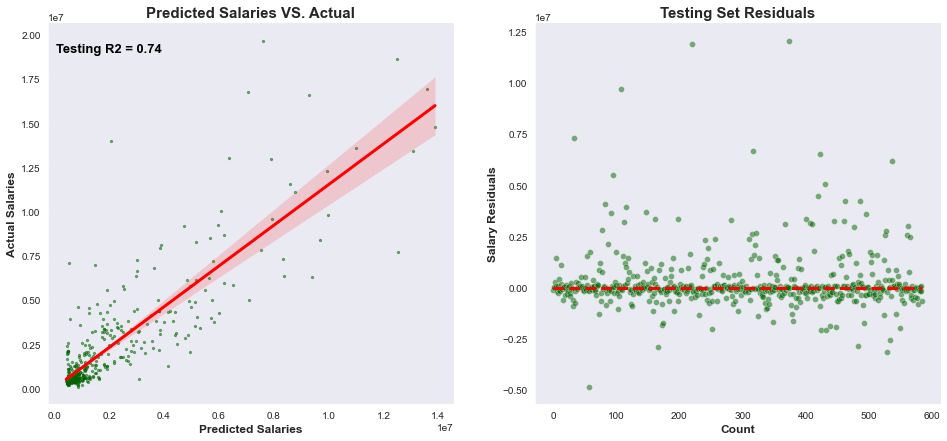

In [89]:
sns.set_style("dark")

# plots TESTING set & residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plots regplots
sns.regplot(ax = axes[0], 
            x = np.exp(y_pred_test), 
            y = np.exp(log_grp_y_test),
            scatter_kws={'s':5, 'alpha': 0.5, 'color': 'darkgreen'},
            line_kws={"color": "red"})

# annotate regplot
axes[0].text(5e4, 1.9e7, "Testing R2 = 0.74", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')

# regplot labels
axes[0].set_xlabel('Predicted Salaries', weight = 'bold') 
axes[0].set_ylabel('Actual Salaries', weight = 'bold') 
axes[0].set_title('Predicted Salaries VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

# plots residual
sns.scatterplot(ax = axes[1], 
                x = range(log_grp_y_test.shape[0]),
                y = resid, 
                alpha=0.5,
                color= "darkgreen")
# plot zero line in residual
sns.lineplot(ax = axes[1], 
             x=range(log_grp_y_test.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)

# residual labels
axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Salary Residuals', weight = 'bold') 
axes[1].set_title('Testing Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, color='#EEEEEE')
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True, color='#EEEEEE')
axes[1].xaxis.grid(False)

plt.show()
fig.savefig('plots/pitching_basic_resids.png');


### Assessing the Important Features

Lets now assess which features in the Gradient Boost model are the most important when making a prediction. 

In [77]:
top_features

['Age',
 'Salary Difference',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches']

In [78]:
# get feature weights
best_model_coef = ensemble_model.feature_importances_
best_model_coef

array([0.12398555, 0.38705917, 0.00682185, 0.00250727, 0.10876715,
       0.00295179, 0.00975826, 0.00191041, 0.00071018, 0.01371336,
       0.04168052, 0.0150148 , 0.03518364, 0.11258534, 0.00130995,
       0.01151281, 0.00151076, 0.00096436, 0.0021298 , 0.00392015,
       0.00175893, 0.00306944, 0.00479961, 0.025141  , 0.0012791 ,
       0.00244392, 0.02332934, 0.00486897, 0.00404256, 0.02356994,
       0.02170004])

In [79]:
# check feature importances 
feat_imp_series = pd.Series(best_model_coef, 
                            index = pp_grp_X_train.columns)

# preview first 5
feat_imp_series[:5]

0    0.123986
1    0.387059
2    0.006822
3    0.002507
4    0.108767
dtype: float64

We need to index these importance features values with their appropriate values to make sense of which Importance value is associated with which Feature. We'll merge the `top_features_df` with the `feat_imp_df`. 

In [80]:
top_features_list = top_features
top_features_df = pd.DataFrame(top_features_list)
top_features_df.head()

,0
0,Age
1,Salary Difference
2,W
3,L
4,WAR


In [81]:
# convert feat_imp_series into a df
feat_imp_df = pd.DataFrame(feat_imp_series)
feat_imp_df.head()

,0
0,0.123986
1,0.387059
2,0.006822
3,0.002507
4,0.108767


In [82]:
# merge the feature names and feature importance dataframes based on index
merged = pd.merge(top_features_df, feat_imp_df, left_index=True, right_index=True)

# rename the new merged dataframe
merged = merged.rename(columns = {'0_x': 'Feature', '0_y': 'Importance'})
merged.head()

,Feature,Importance
0,Age,0.123986
1,Salary Difference,0.387059
2,W,0.006822
3,L,0.002507
4,WAR,0.108767


In [83]:
# sort by top 15 most important features
sorted_features = merged.sort_values('Importance', ascending = False)

# create a top 15 features df
top_15_features = sorted_features.head(15)
top_15_features

,Feature,Importance
1,Salary Difference,0.387059
0,Age,0.123986
13,TBF,0.112585
4,WAR,0.108767
10,SV,0.041681
12,IP,0.035184
23,SO,0.025141
29,Strikes,0.023570
26,LD,0.023329
30,Pitches,0.021700


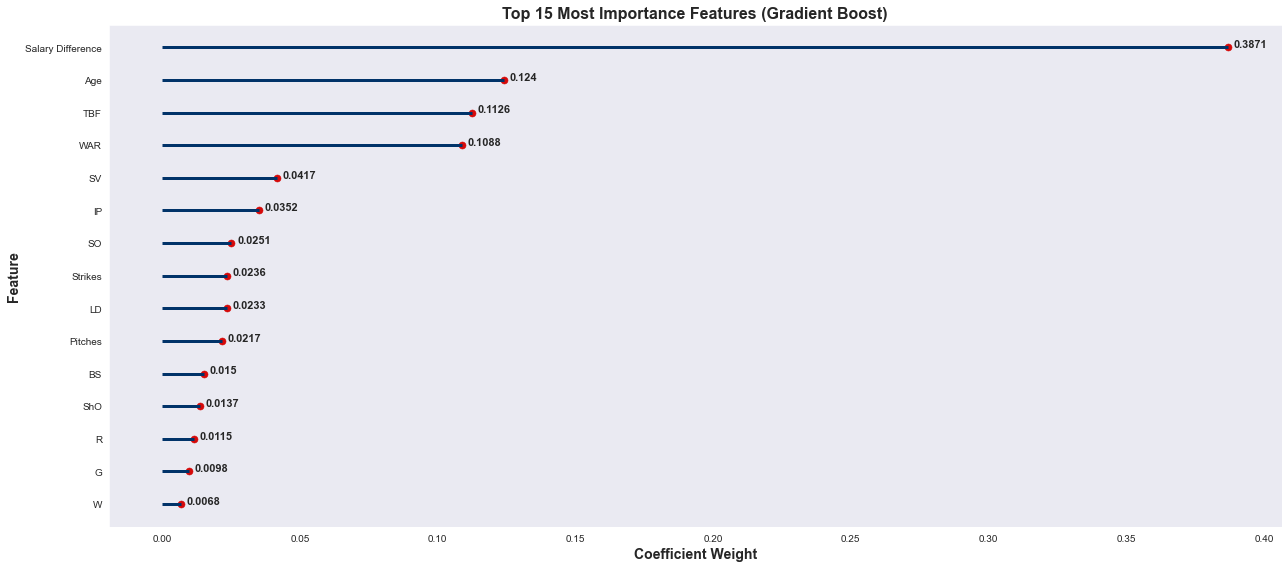

In [84]:
# plot a lollipop plot of top 15 most important features
fig, ax = plt.subplots(figsize=(18, 8))
plt.style.use('bmh')

# sort by descending
top_15_features= top_15_features.sort_values(by = 'Importance')

# plots the lines
plt.hlines(y = top_15_features['Feature'],  # feature
           xmin = 0,
           xmax = top_15_features['Importance'],  # importance
           color = '#013369', linewidth = 3)

plt.scatter(top_15_features['Importance'], # Count values
            top_15_features['Feature'],  # positions
            color='#d50a0a', 
            alpha=1, s = 50)

# annotate the scatter plot values
for idx, row in top_15_features.iterrows():
    ax.annotate(round(row['Importance'],4), (row['Importance'], row['Feature'] ), 
                weight = "bold", fontsize = 11, 
                xytext=(row['Importance'] + 0.002, row['Feature'])) # offset annotate

plt.title('Top 15 Most Importance Features (Gradient Boost)', weight = "bold", fontsize = 16)
plt.ylabel('Feature', weight = "bold", fontsize = 14)
plt.xlabel('Coefficient Weight', weight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()
#fig.savefig('images/pb_important_features.png');